# DISPLAY MAPS

## Display sea ice statistics maps in the Weddell Sea using .nc files
- Read netCDF files for the sea ice statistics
- Draw sea ice statistics maps in the Weddell Sea

Credited by Younghyun Koo (kooala317@gmail.com)

## (1) Import necessary libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import numpy as np
import h5py
import matplotlib.pylab as plt
from math import *
import netCDF4
from netCDF4 import date2num,num2date
import pandas as pd
import cartopy.crs as ccrs
import datetime as dt

## (2) Read .nc file

In [58]:
# Enter name of the .nc file
ncname = f'D:\\Floes\\array\\Grid_fb_v6_entire_SD.nc'

with netCDF4.Dataset(ncname, 'r') as nc:
    keys = nc.variables.keys()
    print(keys)
    
    # X/Y coordinates and lat/lon on the NSIDC sea ice stereogeographic south
    x = np.array(nc.variables['x'])
    y = np.array(nc.variables['y'])
    xx, yy = np.meshgrid(x, y)
    lat = np.array(nc.variables['lat'])
    lon = np.array(nc.variables['lon'])
    
    # Times in seconds from 1800/01/01
    times = np.array(nc.variables['time'])
    t = num2date(nc.variables['time'], nc.variables['time'].units)
    
    # Freeboard statistics
    fmode = np.array(nc.variables['fb_mode'])
    fmean = np.array(nc.variables['fb_mean'])
    fmed = np.array(nc.variables['fb_med'])
    fstd = np.array(nc.variables['fb_std'])
    fridge = np.array(nc.variables['fr_ridge'])
    hridge = np.array(nc.variables['h_ridge'])
    flead = np.array(nc.variables['fr_lead'])
    
    # Floe statistics
    flen = np.array(nc.variables['floe_len'])
    fcnt = np.array(nc.variables['floe_cnt'])

dict_keys(['x', 'y', 'time', 'lat', 'lon', 'fb_mode', 'fb_mean', 'fb_med', 'fb_std', 'fr_ridge', 'h_ridge', 'fr_lead', 'floe_len', 'floe_cnt'])


## (3) Draw maps in the Weddell Sea

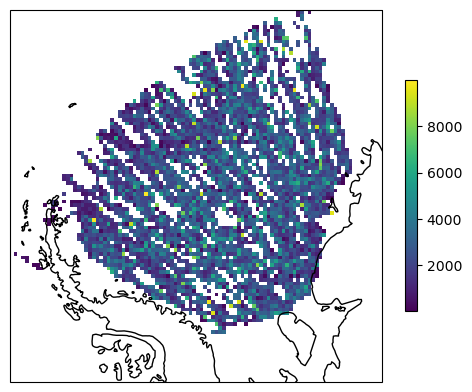

In [96]:
# Draw the mean of the variable in the time series from date1 to date2
date1 = dt.datetime(2021, 9, 1)
date2 = dt.datetime(2021, 10, 1)

fig, ax = fig, ax = plt.subplots(1, 1, figsize=(6,6), dpi= 100, subplot_kw={'projection': ccrs.SouthPolarStereo()})
ax.coastlines()
idx = (t >= date1) & (t < date2)
m = ax.pcolormesh(xx, yy, np.nanmean(flen[idx], axis=0))
fig.colorbar(m, ax=ax, shrink = 0.5)